In [1]:
import pandas as pd
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/samiksha/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samiksha/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/samiksha/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [9]:
def clean_text(text):
    # step 1: make lowercase
    text = text.lower()
    # step 2: remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # step 3: remove @mentions
    text = re.sub(r'@\S+', '', text)
    # step 4: remove special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # step 5: remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [10]:
test = "I'm feeling SO anxious today!!! Check https://help.com @therapist #mentalhealth"
print(clean_text(test))

im feeling so anxious today check mentalhealth


In [11]:
test_sentences = [
    "I've been feeling really down lately... can't sleep @doctor https://mentalhealth.org",
    "Today was AMAZING!!! I finally talked to someone about my feelings #recovery #hope",
    "nothing matters anymore... what's the point? @helpline call 1-800-555-0199",
    "Therapy is helping me SO much, I feel like a new person!!! :) :) :)",
    "I'm so stressed about work & life, everything feels overwhelming #anxiety #burnout"
]

for sentence in test_sentences:
    print(f"BEFORE: {sentence}")
    print(f"AFTER:  {clean_text(sentence)}")
    print("---")

BEFORE: I've been feeling really down lately... can't sleep @doctor https://mentalhealth.org
AFTER:  ive been feeling really down lately cant sleep
---
BEFORE: Today was AMAZING!!! I finally talked to someone about my feelings #recovery #hope
AFTER:  today was amazing i finally talked to someone about my feelings recovery hope
---
BEFORE: nothing matters anymore... what's the point? @helpline call 1-800-555-0199
AFTER:  nothing matters anymore whats the point call
---
BEFORE: Therapy is helping me SO much, I feel like a new person!!! :) :) :)
AFTER:  therapy is helping me so much i feel like a new person
---
BEFORE: I'm so stressed about work & life, everything feels overwhelming #anxiety #burnout
AFTER:  im so stressed about work life everything feels overwhelming anxiety burnout
---


In [12]:
blob = TextBlob("I feel really happy today")
print(blob.sentiment)

Sentiment(polarity=0.8, subjectivity=1.0)


In [13]:
test_phrases = [
    "I feel really happy today",
    "Everything is hopeless and I hate my life",
    "The weather is cloudy",
    "I'm so grateful for my friends",
    "I can't stop crying"
]

for phrase in test_phrases:
    blob = TextBlob(phrase)
    print(f"{phrase}")
    print(f"  Polarity: {blob.sentiment.polarity}, Subjectivity: {blob.sentiment.subjectivity}")
    print()

I feel really happy today
  Polarity: 0.8, Subjectivity: 1.0

Everything is hopeless and I hate my life
  Polarity: -0.8, Subjectivity: 0.9

The weather is cloudy
  Polarity: 0.0, Subjectivity: 0.0

I'm so grateful for my friends
  Polarity: 0.0, Subjectivity: 0.0

I can't stop crying
  Polarity: -0.2, Subjectivity: 0.6



In [26]:
def analyze_sentiment(text):
    # step 1: clean the text using your clean_text function
    cleaned = clean_text(text)
    # step 2: create a TextBlob from the cleaned text
    blob = TextBlob(cleaned)
    # step 3: get the polarity score
    polarity = blob.sentiment.polarity
    # step 4: decide the label:
    #   polarity > 0.1  → "positive"
    #   polarity < -0.1 → "negative"
    #   otherwise       → "neutral"
    if polarity > 0.1:
        label = "positive"
    elif polarity < -0.1:
        label = "negative"
    else:
        label = "neutral"
    
    # step 5: return the label and the polarity score
    return label, polarity
print(analyze_sentiment("I feel really happy today"))
print(analyze_sentiment("Everything is hopeless"))
print(analyze_sentiment("The meeting is at 3pm"))

('positive', 0.8)
('neutral', 0.0)
('neutral', 0.0)


In [27]:
test_sentences = [
    "I'm so grateful for my therapist",
    "I can't stop crying and I feel alone",
    "Today was an okay day, nothing special",
    "Life is beautiful and I feel strong",
    "I'm exhausted and anxious about everything"
]

for sentence in test_sentences:
    label, score = analyze_sentiment(sentence)
    print(f"{sentence}")
    print(f"  → {label} ({score})")
    print()

I'm so grateful for my therapist
  → neutral (0.0)

I can't stop crying and I feel alone
  → negative (-0.2)

Today was an okay day, nothing special
  → positive (0.4285714285714286)

Life is beautiful and I feel strong
  → positive (0.6416666666666666)

I'm exhausted and anxious about everything
  → negative (-0.325)



In [29]:
emotion_keywords = {
    "anxiety": ["anxious", "worried", "nervous", "panic", "fear", "stress",
                "restless", "uneasy", "dread", "tension", "scared", "overthinking",
                "worry", "frightened", "shaking", "sweating"],
    "depression": ["sad", "hopeless", "empty", "worthless", "lonely", "tired",
                   "exhausted", "crying", "numb", "helpless", "miserable", "despair",
                   "alone", "dark", "pointless", "melancholy"],
    "anger": ["angry", "furious", "frustrated", "irritated", "rage", "annoyed",
              "hostile", "bitter", "resentful", "mad", "hate", "enraged"],
    "positive": ["happy", "grateful", "hopeful", "better", "strong", "proud",
                 "confident", "peaceful", "motivated", "excited", "joy", "love",
                 "calm", "blessed", "optimistic", "healing"]
}


In [31]:
def detect_emotions(text):
    # step 1: clean the text using clean_text()
    cleaned = clean_text(text)
    # step 2: split the text into individual words
    words = cleaned.split()
    # step 3: loop through each emotion in emotion_keywords
    results = {}
    
    for emotion, keywords in emotion_keywords.items():
        count = 0
        for word in words:
            if word in keywords:
                count = count + 1
        results[emotion] = count
    
    return results

In [32]:
print(detect_emotions("I feel so anxious and scared, worried about everything"))
print(detect_emotions("I'm happy and grateful for my life"))
print(detect_emotions("I feel sad, lonely and completely hopeless"))

{'anxiety': 3, 'depression': 0, 'anger': 0, 'positive': 0}
{'anxiety': 0, 'depression': 0, 'anger': 0, 'positive': 2}
{'anxiety': 0, 'depression': 3, 'anger': 0, 'positive': 0}


In [33]:
def classify_severity(sentiment_label, polarity, emotions):
    negative_count = emotions.get("anxiety", 0) + emotions.get("depression", 0) + emotions.get("anger", 0)
    
    if sentiment_label == "negative" and negative_count >= 3:
        severity = "high"
    elif sentiment_label == "negative" or negative_count >= 1:
        severity = "moderate"
    else:
        severity = "low"
    
    return severity

In [34]:
print(classify_severity("negative", -0.5, {"anxiety": 3, "depression": 1, "anger": 0, "positive": 0}))
print(classify_severity("negative", -0.2, {"anxiety": 1, "depression": 0, "anger": 0, "positive": 0}))
print(classify_severity("positive", 0.8, {"anxiety": 0, "depression": 0, "anger": 0, "positive": 2}))

high
moderate
low


In [35]:
class MentalHealthAgent:
    
    def analyze(self, text):
        # Step 1: Clean text
        cleaned = clean_text(text)
        
        # Step 2: Analyze sentiment
        sentiment_label, polarity = analyze_sentiment(text)
        
        # Step 3: Detect emotions
        emotions = detect_emotions(text)
        
        # Step 4: Classify severity
        severity = classify_severity(sentiment_label, polarity, emotions)
        
        # Step 5: Generate response based on severity
        response = self.generate_response(severity, sentiment_label, emotions)
        
        return {
            "original_text": text,
            "cleaned_text": cleaned,
            "sentiment": sentiment_label,
            "polarity": polarity,
            "emotions": emotions,
            "severity": severity,
            "response": response
        }
    
    def generate_response(self, severity, sentiment, emotions):
        top_emotion = max(emotions, key=emotions.get)
        
        if severity == "high":
            return f"I notice you're experiencing significant {top_emotion}. Please consider reaching out to a mental health professional or calling a helpline. You're not alone."
        elif severity == "moderate":
            return f"It sounds like you're dealing with some {top_emotion}. Consider talking to someone you trust about how you're feeling."
        else:
            if sentiment == "positive":
                return "It's great to hear you're feeling positive! Keep nurturing what's working well for you."
            else:
                return "You seem to be doing okay. Remember to check in with yourself regularly."

In [36]:
agent = MentalHealthAgent()

test_inputs = [
    "I feel so anxious and scared, I can't stop worrying about everything",
    "Today was a great day, I'm feeling happy and grateful",
    "I'm a little stressed about work but managing okay",
    "Everything feels hopeless, I'm so sad and alone, nothing matters"
]

for text in test_inputs:
    result = agent.analyze(text)
    print(f"Input: {text}")
    print(f"Sentiment: {result['sentiment']} ({result['polarity']})")
    print(f"Emotions: {result['emotions']}")
    print(f"Severity: {result['severity']}")
    print(f"Response: {result['response']}")
    print("---")

Input: I feel so anxious and scared, I can't stop worrying about everything
Sentiment: negative (-0.25)
Emotions: {'anxiety': 2, 'depression': 0, 'anger': 0, 'positive': 0}
Severity: moderate
Response: It sounds like you're dealing with some anxiety. Consider talking to someone you trust about how you're feeling.
---
Input: Today was a great day, I'm feeling happy and grateful
Sentiment: positive (0.8)
Emotions: {'anxiety': 0, 'depression': 0, 'anger': 0, 'positive': 2}
Severity: low
Response: It's great to hear you're feeling positive! Keep nurturing what's working well for you.
---
Input: I'm a little stressed about work but managing okay
Sentiment: positive (0.15625)
Emotions: {'anxiety': 0, 'depression': 0, 'anger': 0, 'positive': 0}
Severity: low
Response: It's great to hear you're feeling positive! Keep nurturing what's working well for you.
---
Input: Everything feels hopeless, I'm so sad and alone, nothing matters
Sentiment: negative (-0.5)
Emotions: {'anxiety': 0, 'depression'

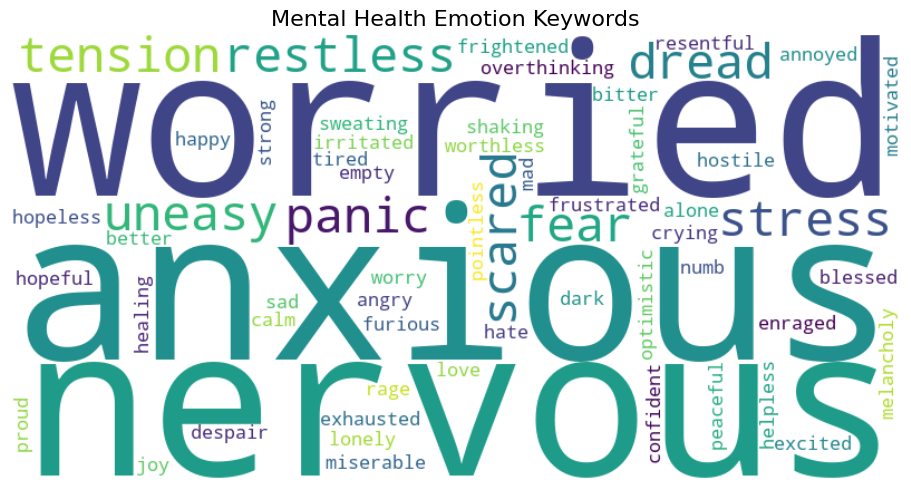

In [37]:
from wordcloud import WordCloud

all_keywords = []
for emotion, keywords in emotion_keywords.items():
    all_keywords.extend(keywords)

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(" ".join(all_keywords))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Mental Health Emotion Keywords", fontsize=16)
plt.tight_layout()
plt.show()

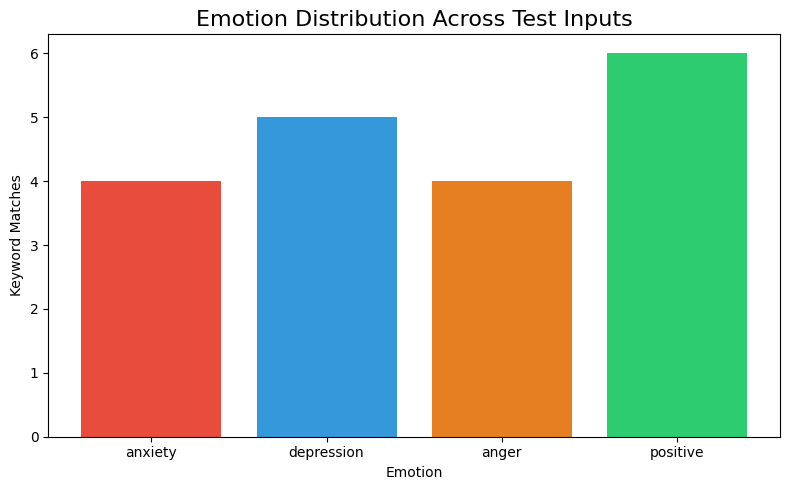

In [38]:
test_texts = [
    "I feel so anxious and scared about everything",
    "I'm happy and grateful for today",
    "Everything feels hopeless and sad, I'm so lonely",
    "I'm angry and frustrated with everyone",
    "Feeling nervous and stressed about work",
    "I'm proud and confident about my progress",
    "So tired and empty, can't get out of bed",
    "Worried and panicking about the future",
    "I feel motivated and excited about life",
    "I'm bitter and resentful about what happened"
]

emotion_totals = {"anxiety": 0, "depression": 0, "anger": 0, "positive": 0}

for text in test_texts:
    emotions = detect_emotions(text)
    for emotion, count in emotions.items():
        emotion_totals[emotion] += count

plt.figure(figsize=(8, 5))
colors = ["#e74c3c", "#3498db", "#e67e22", "#2ecc71"]
plt.bar(emotion_totals.keys(), emotion_totals.values(), color=colors)
plt.title("Emotion Distribution Across Test Inputs", fontsize=16)
plt.xlabel("Emotion")
plt.ylabel("Keyword Matches")
plt.tight_layout()
plt.show()

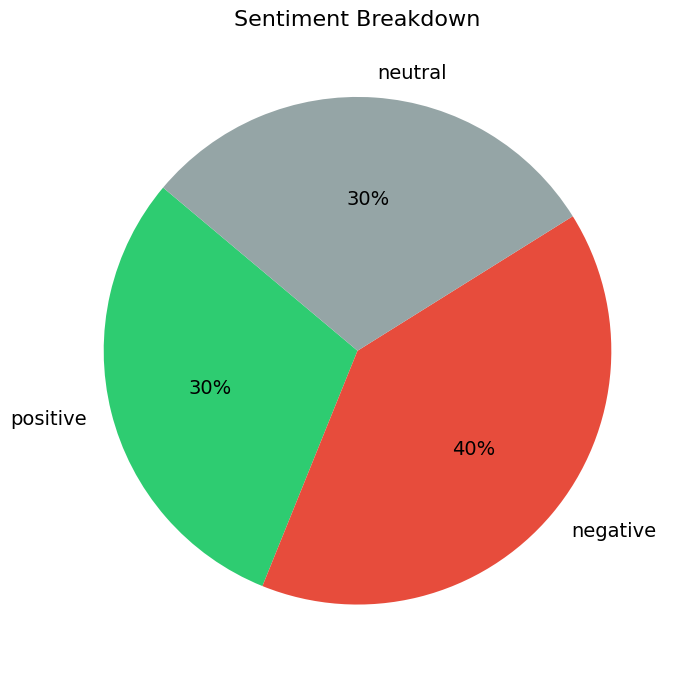

In [39]:
sentiment_counts = {"positive": 0, "negative": 0, "neutral": 0}

for text in test_texts:
    label, score = analyze_sentiment(text)
    sentiment_counts[label] += 1

plt.figure(figsize=(7, 7))
colors = ["#2ecc71", "#e74c3c", "#95a5a6"]
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), colors=colors,
        autopct="%1.0f%%", startangle=140, textprops={"fontsize": 14})
plt.title("Sentiment Breakdown", fontsize=16)
plt.tight_layout()
plt.show()

In [40]:
results_data = []
for text in test_texts:
    result = agent.analyze(text)
    results_data.append({
        "Text": text[:50] + "...",
        "Sentiment": result["sentiment"],
        "Severity": result["severity"],
        "Top Emotion": max(result["emotions"], key=result["emotions"].get)
    })

summary_df = pd.DataFrame(results_data)
summary_df

,Text,Sentiment,Severity,Top Emotion
0,I feel so anxious and scared about everything...,negative,moderate,anxiety
1,I'm happy and grateful for today...,positive,low,positive
2,"Everything feels hopeless and sad, I'm so lone...",negative,high,depression
3,I'm angry and frustrated with everyone...,negative,moderate,anger
4,Feeling nervous and stressed about work...,neutral,moderate,anxiety
5,I'm proud and confident about my progress...,positive,low,positive
6,"So tired and empty, can't get out of bed...",negative,moderate,depression
7,Worried and panicking about the future...,neutral,moderate,anxiety
8,I feel motivated and excited about life...,positive,low,positive
9,I'm bitter and resentful about what happened...,neutral,moderate,anger
